In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
datadir = Path("../data/")
wc_presentf = datadir / "Climate"/ "ISEA3H09_WC30AS_V14_BIO.txt"
wc_futuref = datadir / "Climate"/ "ISEA3H09_WC30AS_V14_CMIP5_CCSM4_RCP85_2070_BIO.txt"

# Exploring the WorldClim variables
This data is the 30 arc seconds climate surface data (version 1.4) from www.worldclim.org, aggregated into ISEA3H09 hexagonal grids. The future data was calculated by first simulating the difference between bioclimatic variables of the future and latest available historical data, then adding the difference to the latest available historical data. The simulation was done by CCSM4 under thee RCP8.5 assumption.

## Table of contents:
* [1. Visualizing histograms](#hist)
    * [Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11)](#group1)
    * [Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07)](#group2)
    * [Group 3: Precipitation-related: precipitation of quarters (BIO16, BIO17, BIO18, BIO19)](#group3)
    * [Group 4: Precipitation-related (BIO12, BIO13, BIO14, BIO15)](#group4)
* [ 2. Visualizing the correlation matrix](#1950-2000corr)

In [3]:
# downloading the present-day data
present = pd.read_csv(wc_presentf, sep="\t")
present.sample(5)

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
95751,95752,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.00000,-1000.000000
81157,81158,-9.694397,87.322355,22.06361,10055.389269,185.773411,-196.03141,381.804821,106.782734,-85.332599,123.723032,-136.805227,478.192215,63.220351,25.356355,31.300823,174.526106,78.106323,168.09048,88.611572
127552,127553,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.00000,-1000.000000
126047,126048,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.00000,-1000.000000
144237,144238,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.00000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.00000,-1000.000000


In [4]:
# downloading the future data
future = pd.read_csv(wc_futuref, sep="\t")
future.sample(5)

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
106767,106768,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
86890,86891,-61.687755,83.266443,14.027986,16143.803100,224.709846,-338.483685,563.193530,145.508310,-259.368469,145.508310,-268.744137,293.989829,40.727365,13.578656,37.282252,113.593215,44.706285,113.593215,44.707974
49946,49947,275.073193,110.174522,74.358555,858.768621,356.115991,208.750733,147.365258,265.618994,280.746097,286.637573,264.725624,1669.441119,282.982050,18.976686,65.357292,800.276188,65.828677,238.173909,687.362744
181712,181713,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
130415,130416,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000


In [5]:
# check for missing data - seems to be none
print("Present-day null values:", present.isnull().values.any())
print("Future null values:", future.isnull().values.any())

Present-day null values: False
Future null values: False


**About the -1000.00000:**

Those are values where the interpolation is out of scope - WorldClim only has data on land.

In [6]:
# how many hexagonal grids are out of scope
print("Present-day rows containing -1000: ", sum((present==-1000.000000).any(axis=1)))
print("Future rows containing -1000: ", sum((future==-1000.000000).any(axis=1)))

Present-day rows containing -1000:  138425
Future rows containing -1000:  138425


In [7]:
# saving the out-of-scope hexagons to file for visualization in QGIS
WCpresent_OOS = present[(present==-1000.000000).any(axis=1)]
WCfuture_OOS = future[(future==-1000.000000).any(axis=1)]

WCpresent_OOS.drop(WCpresent_OOS.columns.difference(['HID']), 1,inplace=True)
WCfuture_OOS.drop(WCfuture_OOS.columns.difference(['HID']), 1,inplace=True)

WCpresent_OOS["historical_OOS"] = 1
WCfuture_OOS["future_OOS"] = 1

print("Out of scope hexagons consistent:", (WCpresent_OOS["historical_OOS"] == WCfuture_OOS["future_OOS"]).all())

#WCpresent_OOS.to_csv("wc_historical_OOS.csv", index=False)
#WCfuture_OOS.to_csv("wc_future_OOS.csv", index=False)

Out of scope hexagons consistent: True


/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-7-83d08b267a50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WCpresent_OOS["historical_OOS"] = 1
<ipython-input-7-83d08b267a50>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [8]:
# exclude out-of-scope hexagons
present = present[(present!=-1000.000000).all(axis=1)]
future = future[(future!=-1000.000000).all(axis=1)]

In [9]:
# basic statistics, present-day, something off about the temperature variables and everything derived from them
present.describe(include="all")

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
count,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000
mean,68047.715856,130.722811,113.859131,44.628589,6667.095842,284.268972,-22.035896,306.304868,179.873733,88.188571,213.504156,43.562612,847.171243,141.355842,23.994085,64.042212,373.741683,84.911611,238.256241,159.027903
std,46491.893269,132.441108,30.856768,21.075776,4943.364412,89.073775,186.554649,136.590511,93.586086,185.578708,84.516354,187.556644,800.527036,128.834878,38.100970,35.335608,342.807215,126.637382,216.311406,244.431541
min,1.000000,-245.968467,9.444425,9.000000,76.999960,-57.048199,-534.243495,53.599996,-240.483286,-438.771999,-93.428380,-474.849895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37047.500000,28.006419,90.030457,25.066032,2251.929575,230.095067,-174.453432,193.154451,114.087142,-67.153081,154.956373,-108.082136,275.893490,50.089111,1.826495,35.750402,128.481901,9.278108,81.808861,22.060174
50%,60546.000000,173.719678,113.685877,43.361631,5936.022593,305.943827,33.665729,298.394568,198.299336,168.617675,237.933860,104.313096,576.730968,94.948352,10.009060,58.392907,249.168780,38.803826,191.272126,62.419635
75%,84933.500000,248.420233,138.324224,60.183840,10179.795653,340.826790,134.538151,402.621526,256.810020,242.255033,273.750404,210.593357,1205.751586,212.796424,27.902240,87.486552,560.060422,99.801226,322.304708,172.170917
max,195662.000000,314.048490,202.064818,94.500018,22615.814457,487.120250,257.928572,724.304266,372.894884,361.369772,378.192879,288.820000,7775.508207,1714.665114,477.689918,233.134778,3878.517267,1510.326287,3020.802083,3253.774091


In [10]:
# basic statistics, future, there is still something off about the temperature variables and everything derived from them
future.describe()

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
count,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000
mean,68047.715856,169.778771,113.337608,44.119622,6550.329179,324.574529,19.943908,304.630621,209.468849,133.489118,251.796443,84.384483,885.248118,151.538758,24.459950,64.561414,395.183374,88.002603,237.548963,182.642618
std,46491.893269,123.446536,31.658198,20.822706,4674.310020,88.401397,172.572178,130.507266,96.100712,173.259488,82.535433,174.628862,840.449182,141.029709,39.576475,36.685117,368.445168,134.317257,226.772757,275.335206
min,1.000000,-197.712347,9.499976,7.237353,70.999999,-21.680154,-463.240620,52.875001,-193.008959,-383.833356,-57.505944,-414.203458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37047.500000,72.531616,90.132957,24.997597,2228.456140,277.172835,-113.883227,195.378855,143.485680,-13.400638,198.401960,-55.717043,305.590567,53.500244,1.736101,34.057040,137.535215,9.844200,83.961434,23.823427
50%,60546.000000,206.999609,113.661431,42.535734,6068.710318,340.455358,63.626110,300.153928,232.640184,203.373431,274.073059,135.096213,604.714100,100.089478,10.815764,59.168251,257.509290,42.115954,181.650634,71.873392
75%,84933.500000,280.203420,137.921255,60.261082,9914.645191,381.871672,169.415342,397.790653,286.418444,276.504226,307.275502,243.274455,1244.665866,224.430394,28.775258,89.775782,584.734331,104.370848,318.607546,192.709305
max,195662.000000,346.179872,207.077269,94.100002,21853.673189,533.791555,280.928571,704.014841,422.002597,403.924365,426.499967,322.058991,9631.585758,1792.438108,499.798616,254.928477,4568.971206,1619.574978,3751.166026,3433.972526


## 1. Visualizing histograms <a class="anchor" id="hist"></a>

In [11]:
# Roughly splitting the indices into groups for visualization purposes

# Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11)
group1 = ["BIO01_Mean", "BIO02_Mean", "BIO08_Mean", "BIO09_Mean", "BIO10_Mean", "BIO11_Mean"]

# Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07)
group2 = ["BIO03_Mean", "BIO04_Mean", "BIO05_Mean", "BIO06_Mean", "BIO07_Mean"]

# Group 3: Precipitation-related: precipitation of quarters (BIO16, BIO17, BIO18, BIO19)
group3 = ["BIO16_Mean", "BIO17_Mean", "BIO18_Mean", "BIO19_Mean"]

# Group 4: Precipitation-related (BIO12, BIO13, BIO14, BIO15)
group4 = ["BIO12_Mean", "BIO13_Mean", "BIO14_Mean", "BIO15_Mean"]

# dictionary of what the bioclimatic variables are
var_dict={"BIO01_Mean": "Annual Mean Temperature", "BIO02_Mean":"Mean Diurnal Range (Mean of monthly (max temp - min temp))", 
          "BIO03_Mean":"Isothermality (BIO2/BIO7) (×100)", "BIO04_Mean":"Temperature Seasonality (standard deviation ×100)", 
          "BIO05_Mean":"Max Temperature of Warmest Month", "BIO06_Mean":"Min Temperature of Coldest Month", 
          "BIO07_Mean":"Temperature Annual Range (BIO5-BIO6)", "BIO08_Mean":"Mean Temperature of Wettest Quarter", 
          "BIO09_Mean":"Mean Temperature of Driest Quarter", "BIO10_Mean":"Mean Temperature of Warmest Quarter", 
          "BIO11_Mean":"Mean Temperature of Coldest Quarter","BIO12_Mean":"Annual Precipitation", 
          "BIO13_Mean":"Precipitation of Wettest Month", "BIO14_Mean":"Precipitation of Driest Month", 
          "BIO15_Mean":"Precipitation Seasonality (Coefficient of Variation)","BIO16_Mean":"Precipitation of Wettest Quarter", 
          "BIO17_Mean":"Precipitation of Driest Quarter", "BIO18_Mean":"Precipitation of Warmest Quarter", 
          "BIO19_Mean":"Precipitation of Coldest Quarter"}

### Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11) <a class="anchor" id="group1"></a>

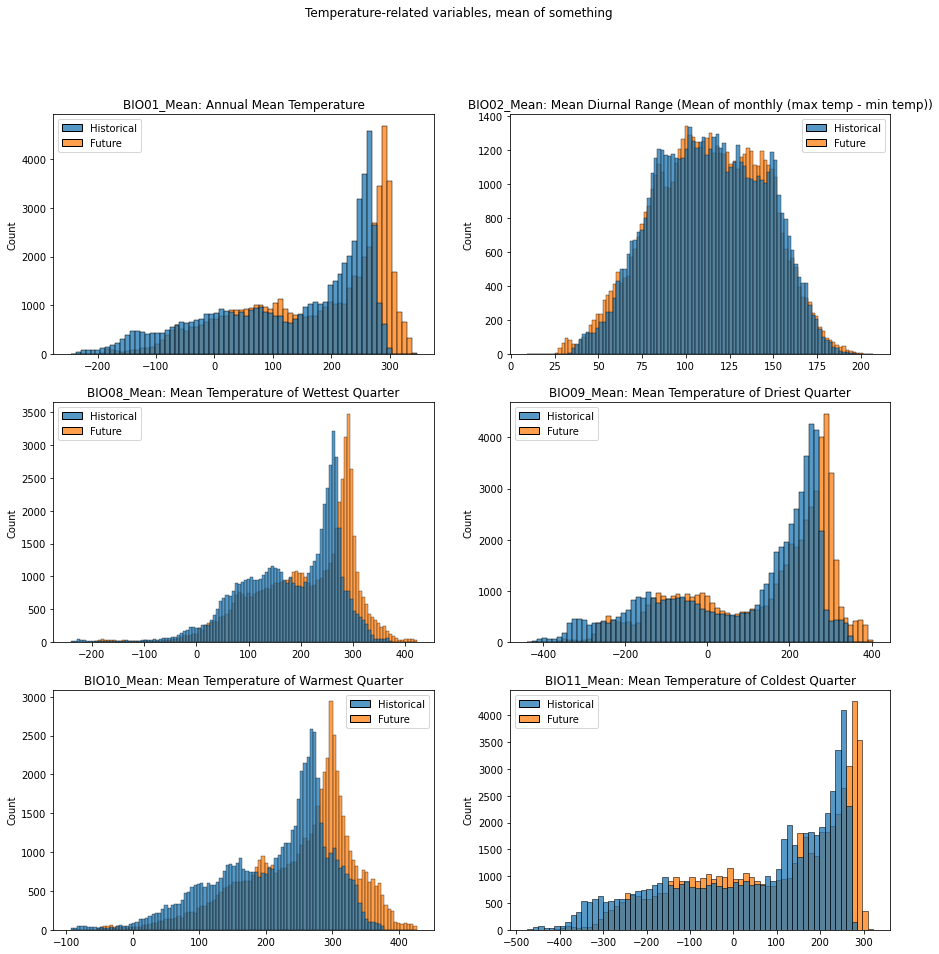

In [12]:
# very bizarre, better check over all bioclimatic variables and consult advisor
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group1, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

### Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07) <a class="anchor" id="group2"></a>

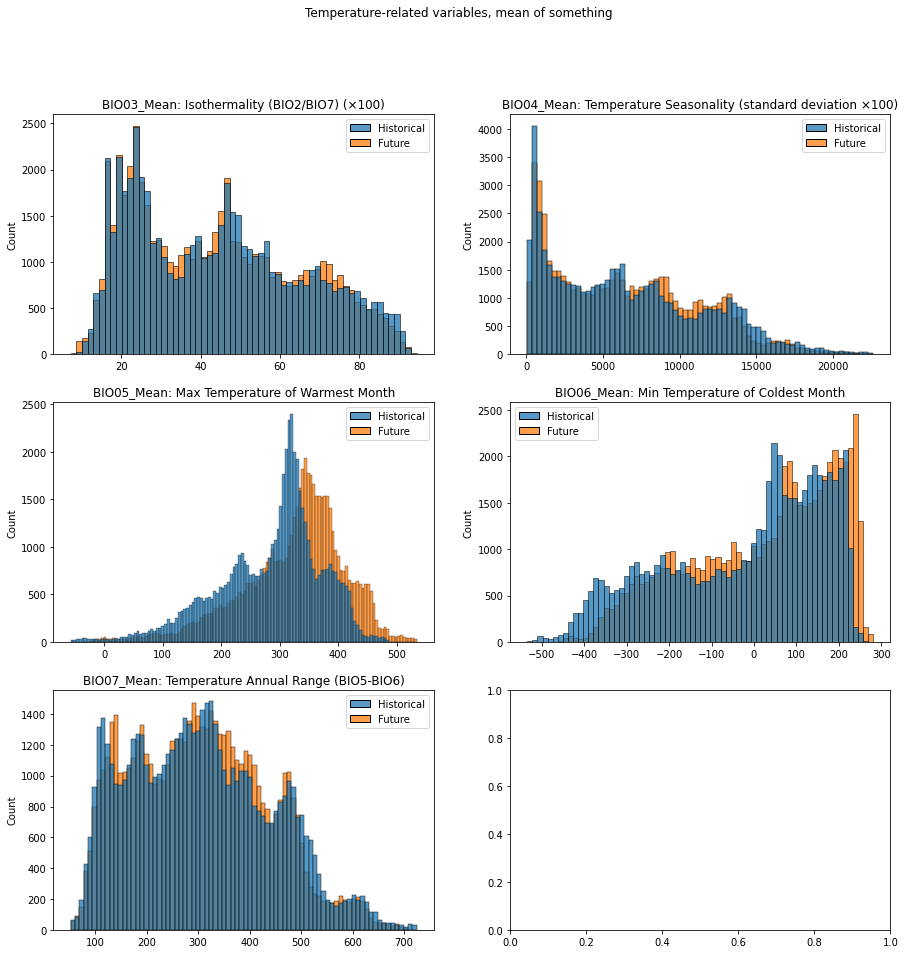

In [13]:
# these are bizarre too
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group2, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

### Group 3: Precipitation-related: precipitation of quarters (BIO16, BIO17, BIO18, BIO19) <a class="anchor" id="group3"></a>

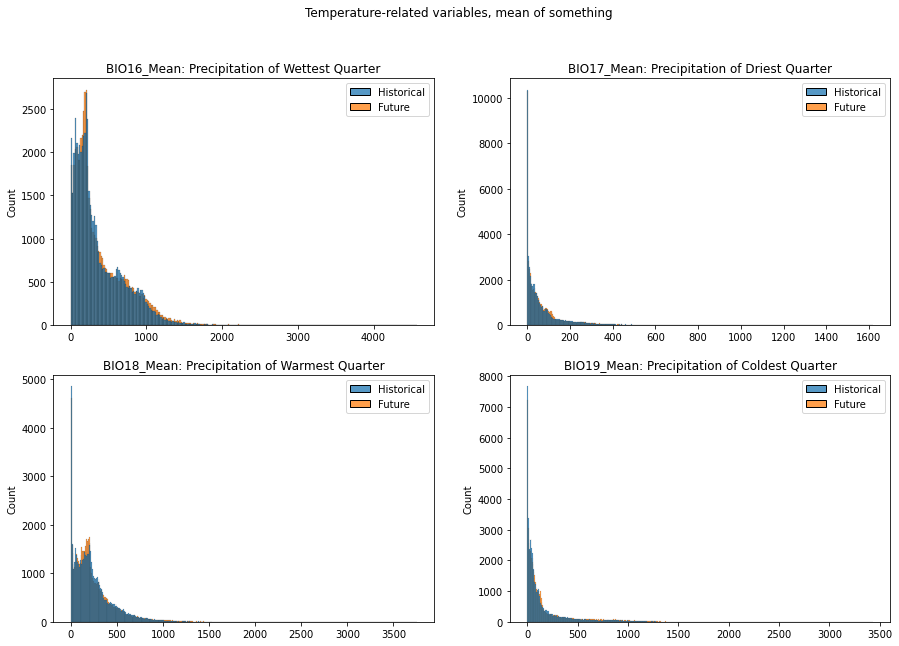

In [14]:
# these look normal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group3, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

### Group 4: Precipitation-related (BIO12, BIO13, BIO14, BIO15) <a class="anchor" id="group4"></a>

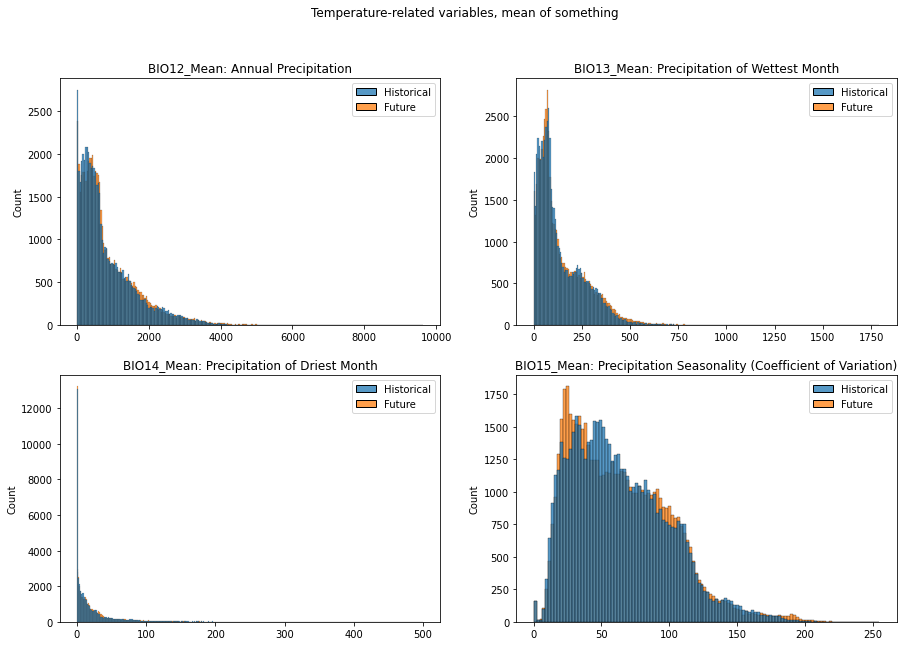

In [15]:
# these look normal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group4, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

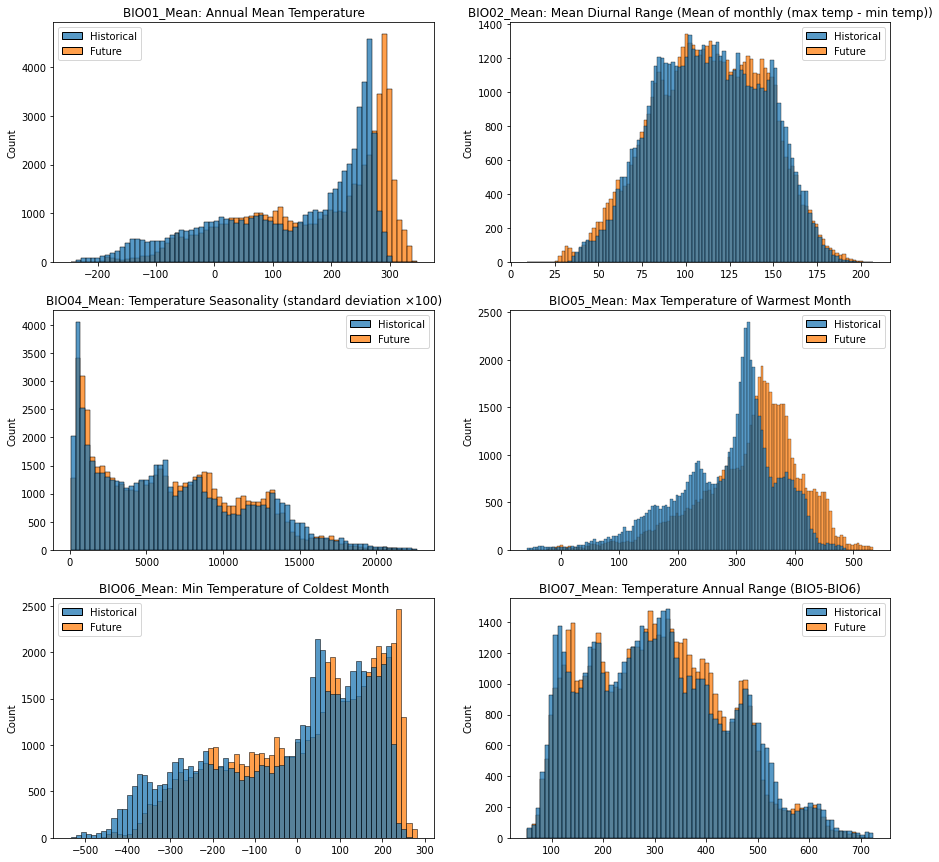

In [21]:
anomalies_g1 = ["BIO01_Mean", "BIO02_Mean", "BIO04_Mean", "BIO05_Mean", "BIO06_Mean", "BIO07_Mean"]
anomalies_g2   = ["BIO08_Mean", "BIO09_Mean", "BIO10_Mean", "BIO11_Mean"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for idx,ax in zip(anomalies_g1, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])
    
plt.savefig("../../visualizations/wctemp_dist1.png")

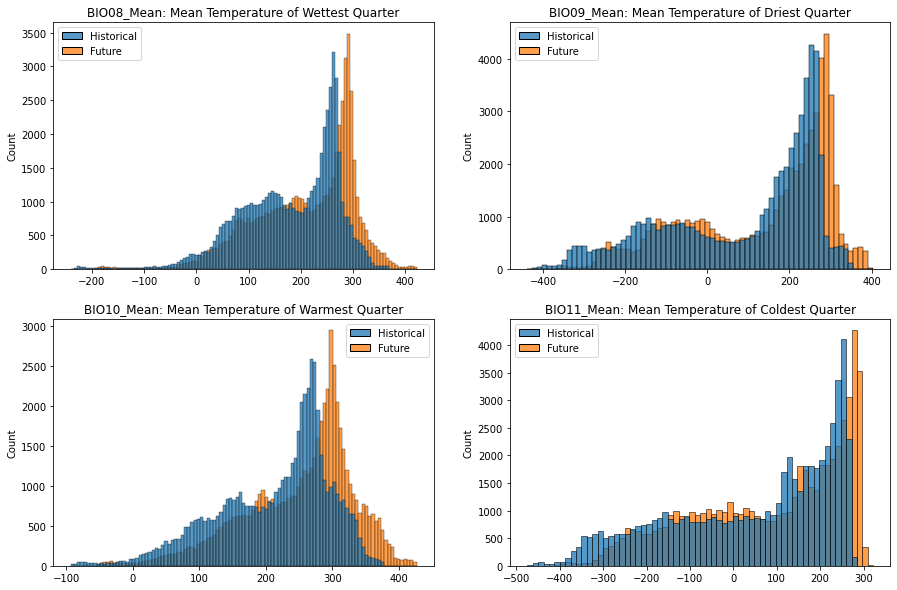

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx,ax in zip(anomalies_g2, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])
    
        
plt.savefig("../../visualizations/wctemp_dist2.png")

Okay, let's arbitrarily set the temperature range of any given period to somewhat realistic ones, \[-60, 60\]. And export the hexagon ids outside of that range to visualize on QGIS.

In [41]:
# no, doesn't work, the temperature range is so strange that when I put realistic restrictions on it, there are no hexagons that fit the criteria

# annual temperature between -60 and 60
# Max Temperature of Warmest Month < =60
# Min Temperature of Coldest Month >= -60
# annual temp range <= 120
# Mean Temperature of Wettest Quarter between -60 and 60
# Mean Temperature of Driest Quarter between -60 and 60
# Mean Temperature of Warmest Quarter between -60 and 60
# Mean Temperature of Coldest Quarter between -60 and 60

set(present[present["BIO01_Mean"].between(-60,60)].HID) & \
set(present[present["BIO05_Mean"]<=60].HID) & \
set(present[present["BIO06_Mean"]>=-60].HID) & \
set(present[present["BIO07_Mean"]<=120].HID) & \
set(present[present["BIO08_Mean"].between(-60,60)].HID) & \
set(present[present["BIO09_Mean"].between(-60,60)].HID) & \
set(present[present["BIO10_Mean"].between(-60,60)].HID) & \
set(present[present["BIO11_Mean"].between(-60,60)].HID) 

set()

Next, let's see what the values are for the training data area.